# Home Work 2 (81)
## (APANPS5335_002_2023_3 - MACHINE LEARNING: CONCEPTS & APPLICATION)

## Submitted by: Eli Guo
## UNI: yg2869
### Posted: 9/19/2023 | Due: 10/2/2023 by 11:59 pm

Instructions: Please submit both the .ipynb file and a PDF version or html. Word documents are not acceptable.

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from statsmodels.formula.api import ols
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
def abline(intercept, slope):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

# Question 1 (9 points)


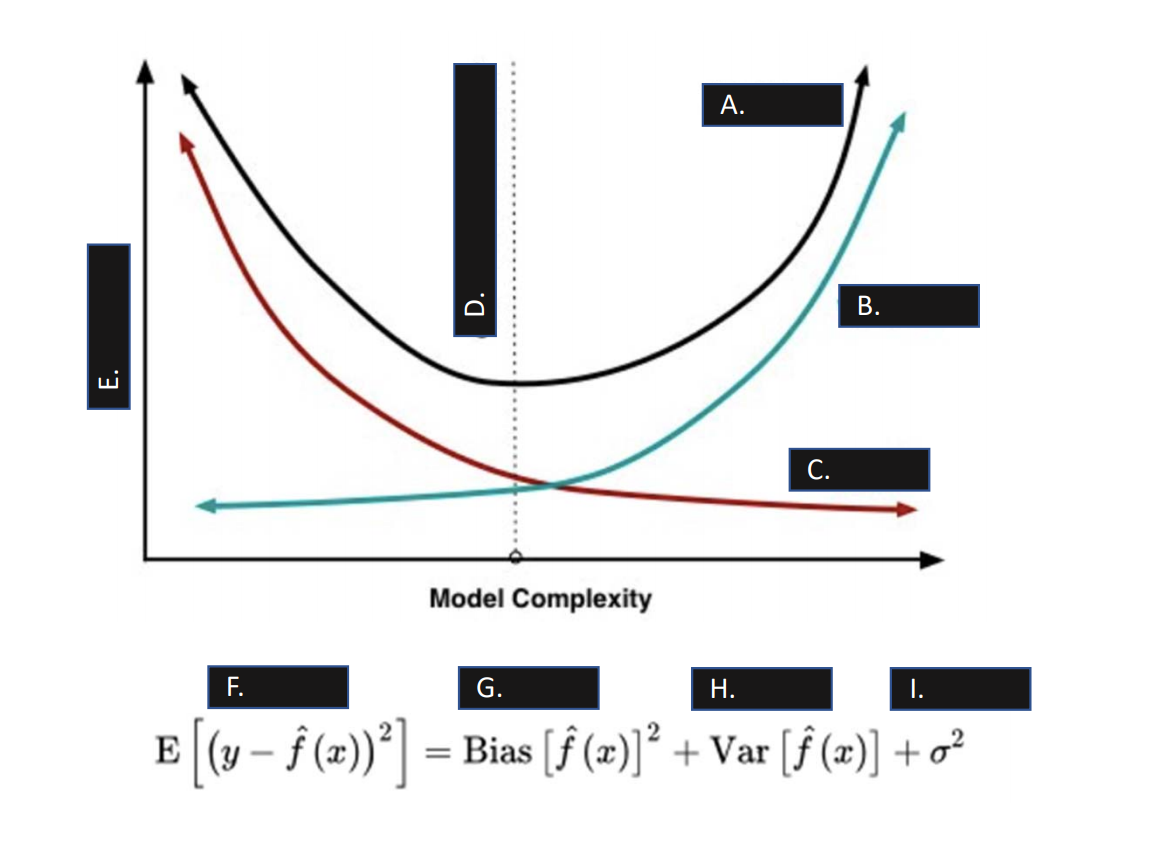

Each of the elements is defined below

A) Total error <br>
B) Variance <br>
C) Bias <br>
D) Optimal model complexity <br>
E) Error <br>
F) Mean Squared Error (MSE) <br>
G) Bias Squared <br>
H) Variance <br>
I) Irreducible Error <br>

Please answer the following questions

## 1(a) (4 points)

Explain what is the difference between the components (F), (H), and (I)

Answer: MSE measures the average squared difference between predicted and actual values, providing an overall view of a model's predictive accuracy. Variance indicates how much predictions would change if using a different training dataset from the same population; high variance suggests a model might be overfitted to the training data. Irreducible error represents the unavoidable noise present in any dataset due to factors like unmeasured variables or inherent randomness.

## 1(b) (4 points)

Explain how does a flexible model differ from a restrictive (i.e., less flexible) model with respect to the elements shown in the figure above.

Answer: Flexible models, with their ability to fit complex data patterns, typically have low bias but risk high variance by potentially overfitting to training data noise. Restrictive models, being simpler, might have higher bias due to missing underlying data intricacies but benefit from lower variance, thus yielding more consistent predictions across various datasets. Both types of models are subject to irreducible error, an inherent dataset noise. Total error encompasses bias, variance, and irreducible error. The goal is to find an optimal model complexity that minimizes the total error, balancing the trade-offs between bias and variance without excessively adapting to the data or being overly simplistic.

## 1(c) (1 point)

Give one example of a more flexible model and one example of a less flexible model.

Answer: KNN, especially with a smaller $k$, is a flexible model that can adapt to intricate data patterns but risks overfitting. In contrast, linear regression assumes a linear relationship, making it inherently less flexible and potentially unable to capture complex, non-linear trends, though it offers stability and interpretability.

# Question 2 (10 points)

Keeping the above picture in Q1 in mind, answer the following questions:

## 2(a) (2 points)

Explain in a few sentences what does expectation $E[(y - \hat{f}(x))^2]$ over the sample data really mean?

Answer: The expression represents the expected value of the squared difference between the actual value $y$ and the predicted value $\hat{f}(x)$ over the sample data. This is commonly referred to as the Mean Squared Error (MSE). In essence, the MSE quantifies the average squared discrepancy between predicted and true values, giving a measure of the model's prediction accuracy.

## 2(b) (2 points)

Why would you consider a less flexible model over a more flexible one? Give specific reasons (explain in writing and/or give an example to illustrate it)

Answer: Choosing a less flexible model over a more flexible one can be beneficial for several reasons. Less flexible models are often easier to understand and interpret, making them preferable when clarity is essential. They are also less prone to overfitting, meaning they won't excessively adapt to noise in the training data, ensuring better generalization to new data. Additionally, they are computationally more efficient and can provide more stable predictions. For instance, when predicting house prices based on the number of bedrooms, if the trend is largely linear, a simple linear regression might suffice. Using a complex model, like a neural network, might overfit to minor fluctuations in the training data, leading to inconsistent predictions for new houses.

## 2(c) (2 point)

Does the bias-variance trade-off apply to unsupervised learning problems? Justify your answer.

Answer: The bias-variance tradeoff does apply to unsupervised learning problems. This is because unsupervised learning algorithms still make assumptions and generalizations about the underlying structure of the data, which can lead to underfitting or overfitting.

For example, k-means clustering makes the assumption that the data can be partitioned into a predefined number of clusters with spherical Gaussian distributions. If the number of clusters is set too low, the model will fail to capture real subgroups in the data, leading to high bias. If k is set too high, the model will overfit by partitioning natural clusters into smaller sub-clusters, leading to high variance. The optimal k must be selected to balance bias and variance.

Principal component analysis (PCA) also faces this tradeoff. Using too few principal components can lead to high bias, failing to capture enough of the dataset variation. Using too many components can lead to overfitting, modeling noise rather than the true latent factors. The number of components must be tuned, often using cross-validation, to optimize this tradeoff.

In summary, unsupervised learning algorithms make inductive assumptions and trade off the flexibility to closely fit the data with the risk of modeling noise. This leads to the universal bias-variance tradeoff, even for unsupervised problems without ground truth labels. Careful model selection and cross-validation can help balance bias and variance.

## 2(d) (2 points)

What do we expect will happen to bias and variance when we increase the sample size and the model is less flexible?

Answer: When increasing the sample size in a dataset, the bias of a less flexible model is expected to remain relatively stable, since bias is primarily a reflection of the model's inherent assumptions and its ability to capture underlying patterns in the data, irrespective of sample size. On the other hand, variance, which measures the model's sensitivity to fluctuations in the training data, is anticipated to decrease with a larger sample size. This is because a greater amount of data tends to provide a more comprehensive representation of the underlying distribution, thereby reducing the likelihood that the model will overfit to random noise or specificities in a smaller subset of the data. Consequently, increasing the sample size will generally bolster the robustness of a less flexible model by mitigating its variance without significantly affecting its bias.

## 2(e) (2 points)

If you are fitting a model where the output has two categories (also called levels), how would you evaluate the performance of your model? Explain.

Answer: When fitting a model where the output has two categories or levels, several metrics are essential for evaluating its performance. The error rate, or the proportion misclassified, quantifies the percentage of predictions that the model gets incorrect, providing a direct insight into the model's accuracy. Sensitivity, often referred to as the true positive rate, measures the proportion of actual positive cases that the model correctly identifies, indicating the model's ability to detect the presence of a particular category. Specificity, on the other hand, represents the true negative rate and assesses the proportion of actual negative cases that the model correctly classifies. Together, sensitivity and specificity offer a comprehensive view of the model's discriminative ability for both categories, ensuring that the performance evaluation is balanced and takes into consideration both false positives and false negatives.

# Question 3 (22 points)

In simple linear regression, we model our prediction $\hat{y}$ as a function of $x$.

$$
\hat{y}_i = \beta_1 x_i + \beta_0 + \epsilon_i
$$

## 3(a) (2 points)

What are the maximum likelihood estimates for $\beta_1$ and $\beta_0$?

Answer: Least Squares Estimates (LSE) obtained by minimizing Mean Square Error (MSE) for $\beta_1$ and $\beta_0$ are:
$\hat{\beta}_1 = \Sigma (x_i - \bar{x})(y_i - \bar{y}) / \Sigma (x_i - \bar{x})^2$; and $\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}$

## 3(b) (4 points)

Create functions to calculate $\beta_1$ and $\beta_0$ given an $x$ vector and a $y$ vector using the MLE equations you found above.

In [3]:
# Please remove the "pass" statement from the function and proceed with your own code
# Write your answer below
def getEstimates(x, y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    
    b1 = np.sum((x - x_bar) * (y - y_bar)) / np.sum((x - x_bar)**2)
    b0 = y_bar - b1 * x_bar
    
    return b0, b1

# Test:
b0 = 1
b1 = 2
x = np.arange(1, 11)
y = b0 + b1*x

getEstimates(x = x, y = y)

## 3(c) (2+2 points)

Load the `prostate_cancer.csv` data set from Canvas. Use ggplot from plotnine library to draw a scatterplot of smoothness x against symmetry y. Also draw a linear model through the points. Label your figure appropriately. Interpret what you find from the scatterplot and the straight line drawn through them.

In [4]:
# Write your answer below

# Load the dataset
data = pd.read_csv('prostate_cancer.csv')

# Scatterplot with linear regression
plot = (
    ggplot(data, aes(x='smoothness', y='symmetry')) +
    geom_point() +
    geom_smooth(method='lm', color='red', se=False) + 
    labs(title="Scatterplot of Smoothness vs. Symmetry",
         x="Smoothness",
         y="Symmetry") +
    theme(plot_title=element_text(hjust=0.5)) # Center the title
)

print(plot)

Interpretation: The scatterplot of smoothness against symmetry showcases a general upward trend, indicating a positive correlation between the two variables: as smoothness increases, symmetry tends to also increase. This observation is emphasized by the upward-sloping linear regression line. However, the points are relatively sparse with some notable outliers, suggesting variability in the data and cautioning against broad generalizations based solely on the trend line.

## 3(d) (3 points)

Use the maximum-likelihood estimates of $\beta_0$ and $\beta_1$ given the data (smoothness x and symmetry y). Use matplotlib to plot the data and the best-fit line using these estimates (hint: use geom_abline()). As always, label your figure appropriately.

Compare your results obtained in 3(c) and 3(d). They should be the same.

In [5]:
# Write your answer below

# Get the intercept (b0) and slope (b1) for the prostate cancer data
b0, b1 = getEstimates(data['smoothness'], data['symmetry'])

# Plot the data using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(data['smoothness'], data['symmetry'], color='blue')
plt.plot(data['smoothness'], b0 + b1 * data['smoothness'], color='red')

plt.title("Scatterplot of Smoothness vs. Symmetry")
plt.xlabel("Smoothness")
plt.ylabel("Symmetry")
plt.grid(True)
plt.show()

In [6]:
# Plot the data using ggplot (geom_abline())
plot = (
    ggplot(data, aes(x='smoothness', y='symmetry')) +
    geom_point() +
    geom_abline(intercept=b0, slope=b1, color='red') +
    labs(title="Scatterplot of Smoothness vs. Symmetry", 
         x='Smoothness', 
         y='Symmetry') +
    theme(plot_title=element_text(hjust=0.5)) # Center the title
)

print(plot)

## 3(e) (4 points)

Give a 95% confidence interval for $\beta_0$ and $\beta_1$. The formula for confidence intervals for $\hat{\beta}_0$ and $\hat{\beta}_1$ involves calculation of standard errors.

Once you obtain those, write a Python function conf_betas() to obtain the confidence intervals.

**Answer**


In [7]:
from scipy.stats import t

# Write your answer below
def conf_betas(x, y, alpha=0.05):
    n = len(x)
    
    # Get the estimates for b0 and b1
    b0, b1 = getEstimates(x, y)
    
    # Calculate residuals and RSS
    e = y - (b0 + b1 * x)
    rss = np.sum(e**2)

    # Compute standard errors
    se_b1 = np.sqrt(rss / ((n-2) * np.sum((x - np.mean(x))**2)))
    se_b0 = se_b1 * np.sqrt(1/n + np.mean(x)**2 / np.sum((x - np.mean(x))**2))
    
    # Calculate confidence intervals using t-distribution
    t_stat = t.ppf(1-alpha/2, n-2)
    ci_b1 = [b1 - t_stat * se_b1, b1 + t_stat * se_b1]
    ci_b0 = [b0 - t_stat * se_b0, b0 + t_stat * se_b0]
    
    return ci_b0, ci_b1

# Test:
x = data['smoothness']
y = data['symmetry']

ci_b0, ci_b1 = conf_betas(x, y)
print(f"95% Confidence Interval for b0: {ci_b0}")
print(f"95% Confidence Interval for b1: {ci_b1}")

## 3(f) (4 points)

Use the statsmodels `ols()` function to fit a linear model `lmFit`. Print the summary statistics for the model. Plot the data and use the `abline()` function to plot the best fit line.

In [8]:
# Write your answer below
# Fit the linear model
lmFit = ols('symmetry ~ smoothness', data=data).fit()

# Print the summary statistics
print(lmFit.summary())

In [9]:
# Plot here
plt.figure(figsize=(10, 6))
plt.scatter(data['smoothness'], data['symmetry'], color='blue')
abline(lmFit.params['Intercept'], lmFit.params['smoothness'])

plt.title('Scatterplot of Smoothness vs. Symmetry')
plt.xlabel('Smoothness')
plt.ylabel('Symmetry')
plt.grid(True)
plt.show()

## 3(g) (1 point)

Print the 95% prediction interval of the symmetry for a tumor with smoothness $x=0.13$. (Hint: Use conf_int function)

In [10]:
x0 = 0.13

# Get the prediction and confidence interval
pred = lmFit.get_prediction({'smoothness': x0})
pred_int = pred.conf_int(alpha=0.05)  # 95% confidence level

# Extract the lower and upper bounds of the prediction interval
lower_bound = pred_int[0, 0]
upper_bound = pred_int[0, 1]

print(f"95% Prediction Interval: [{lower_bound}, {upper_bound}]")

## Question 4 (18 points)

We will explore multiple linear regression using the Real Estate Valuation data set uploaded to HW2 folder on Canvas.

## 4(a) (3 points)

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan

The inputs are as follows

transaction_date=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) <br> house_age = the house age (unit: year) <br> distance_station=the distance to the nearest MRT station (unit: meter) <br> num_conv_stores=the number of convenience stores in the living circle on foot (integer) <br>
latitude=the geographic coordinate, latitude. (unit: degree) <br> longitude=the geographic coordinate, longitude. (unit: degree)

The output is as follows

price_per_unit_area= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

Our goal is to fit a multiple linear regression model to predict the price per unit of area of the houses. Note that there are some variables in the data set that are not meaningful without further processing for modeling the house price. You should exclude them.*italicised text*

In [11]:
# Read the XLSX file.You have use the pd.read_excel function (1)
df = pd.read_excel('RealEstateValuation.xlsx')

# Show the dataframe (1)
print(df)

In [12]:
# Show head of the data set (1 point)
df.head()

## 4(b) (2 points)

Create a subset of the data set by using only the relevant variables for modeling purposes. Produce a scatterplot matrix. Which variables are most correlated (positively and negatively) with the house price?

In [39]:
# Create working data set (1 point)
df = df.drop(columns=['transaction_date'])

In [41]:
# Pairs plot with sns.PairGrid or any suitable package (1 point)
# Produce the correlation matrix
df_ = sns.load_dataset("df")
g = sns.PairGrid(df_)
g.map(sns.scatterplot)

In [ ]:
# Produce the correlation matrix

Answer:

## 4(c) (2 points)

Fit a multiple linear regression model to predict price_per_unit_area using the meaningful variables and produce a summary.

In [15]:
# Write your answer below





## 4(d) (3 points)

Using the summary statistics $F, r^2, p$, explain whether or not there is a relationship between the predictors and the response variable. Which, if any, of the predictors are significant?

In [16]:
# Write your answer below
# Give Fvalue

In [17]:
# Give rsquared (1)

In [18]:
# Give rsquared adjusted (1)

In [19]:
# Give p value of f (1)

Answer:

## 4(e) (3 points)

Plot the true price_per_unit_area against the estimated price_per_unit_area. Plot the diagonal line. Where does the model seem to underestimate price_per_unit_area? Where does the model seem to overestimate price?

In [20]:
# Write your answer below


## 4(f) (2 points)

Should we have used a more flexible model? If so, what kind?

In [21]:
# Write your answer below


Answer

## 4(g) (3 points)

Produce diagnostic plots of your model. Can you detect any outliers? Justify eliminating those outliers.

In [22]:
# Write your answer below


Answer

# Question 5 (8 points)

We will use the following data to explore kNNs.

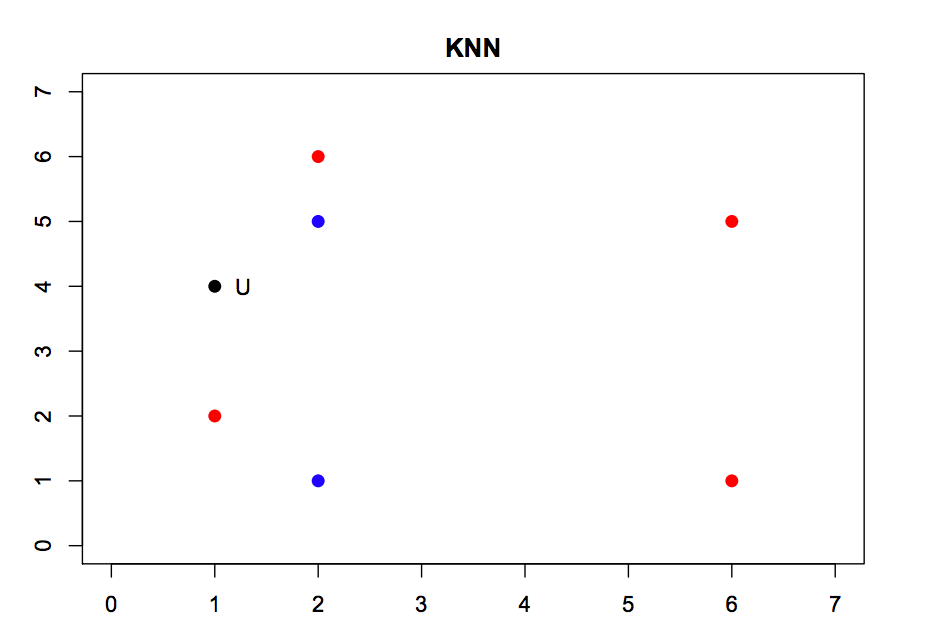

 This figure uses the following data:

In [23]:
x = np.array([1, 1, 2, 2, 2, 6, 6])
y = np.array([4, 2, 6, 5, 1, 5, 1])
color = ['black', 'red', 'red', 'blue', 'blue', 'red', 'red']

## 5(a) (2 points)

Compute the Euclidean distance for each point with respect to the unlabeled point, $U$.

In [24]:
# Write your answer below
# Calculate the Euclidean distances using vectorized operations
distances = np.sqrt((x - 1)**2 + (y - 4)**2)

# Print the distances
print(distances)

## 5(b) (2 points)

What is the kNN label for $U$ when $k=1$? When $k=3$?

In [25]:
# Write your answer below
# Given data (excluding U)
X = np.array([[1, 2], [2, 6], [2, 5], [2, 1], [6, 5], [6, 1]])
y = np.array(['red', 'red', 'blue', 'blue', 'red', 'red'])
U = np.array([[1, 4]])  # Coordinates of the unlabeled point

# Create a KNeighborsClassifier with k = 1
k1_knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier on the labeled data
k1_knn_classifier.fit(X, y)

# Predict the label for the unlabeled point U
k1_predicted_label = k1_knn_classifier.predict(U)

# Print the predicted label for k = 1
print(f"KNN label for U when k = 1: {k1_predicted_label[0]}")

In [26]:
# Create a KNeighborsClassifier with k = 3
k3_knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the labeled data
k3_knn_classifier.fit(X, y)

# Predict the label for the unlabeled point U
k3_predicted_label = k3_knn_classifier.predict(U)

# Print the predicted label for k = 3
print(f"KNN label for U when k = 3: {k3_predicted_label[0]}")

# 5(c) (4 point)

It's also possible to calculate kNN using decision functions different from majority vote. One common scheme is to take weighted votes as a function of distance. The procedure is as follows:
<ul>
<li>Get the k nearest neighbors.

<li>Compute the weight for each red neighbor and sum.

<li>Compute the weight for each blue neighbor and sum.

<li>Choose the label with larger score.

</ul>

There are three common weight functions:
<ul>
<li> Inverse Euclidean Distance: $\|v - u\|^{-1}$

<li> Inverse Square: $\|v - u\|^{-2}$

<li> Gaussian Functional Distance: $e^{-\alpha \|v - u\|^2}$
</ul>
Using Python, give the kNN for $k=6$ using weighted voting for each of the following weight functions:
<ul>
<li>Inverse Euclidean Distance
</ul>

In [27]:
# Write your answer below
# Create a KNeighborsClassifier with k = 6 and Inverse Euclidean Distance weighting
knn_inv_euc = KNeighborsClassifier(n_neighbors=6, weights='distance')

# Fit the classifier on the labeled data
knn_inv_euc.fit(X, y)

# Predict the label for the unlabeled point U
predicted_label_inv_euc = knn_inv_euc.predict(U)

# Print the predicted label
print(f"KNN label for U with Inverse Euclidean Distance weighting (k = 6): {predicted_label_inv_euc[0]}")

<ul>
<li>Inverse Square
</ul>

In [28]:
# Write your answer below
# Define the custom weight function for Inverse Square
def custom_weight(dist):
    return 1 / (dist ** 2)

# Create a KNeighborsClassifier with k = 6
knn_classifier_inv_sq = KNeighborsClassifier(n_neighbors=6, weights=custom_weight)

# Fit the classifier on the labeled data
knn_classifier_inv_sq.fit(X, y)

# Predict the label for the unlabeled point U
predicted_label_inv_sq = knn_classifier_inv_sq.predict(U)

# Print the predicted label
print(f"KNN label for U with Inverse Square weighting (k = 6): {predicted_label_inv_sq[0]}")

<ul>
<li>Gaussian Functional Distance with $\alpha = 0.2$
</ul>

In [29]:
# Write your answer below
# Define the custom weight function for Gaussian Functional Distance with 𝛼 = 0.2
def custom_weight(dist):
    alpha = 0.2
    return np.exp(-alpha * dist ** 2)

# Create a KNeighborsClassifier with k = 6
knn_gauss_0_2 = KNeighborsClassifier(n_neighbors=6, weights=custom_weight)

# Fit the classifier on the labeled data
knn_gauss_0_2.fit(X, y)

# Predict the label for the unlabeled point U
predicted_label_gauss_0_2 = knn_gauss_0_2.predict(U)

# Print the predicted label
print(f"KNN label for U with Gaussian Distance (𝛼 = 0.2) weighting (k = 6): {predicted_label_gauss_0_2[0]}")

<ul>
<li>Gaussian Functional Distance with $\alpha = 0.4$
</ul>

In [30]:
# Write your answer below
# Define the custom weight function for Gaussian Functional Distance with 𝛼 = 0.4
def custom_weight(dist):
    alpha = 0.4
    return np.exp(-alpha * dist ** 2)

# Create a KNeighborsClassifier with k = 6
knn_gauss_0_4 = KNeighborsClassifier(n_neighbors=6, weights=custom_weight)

# Fit the classifier on the labeled data
knn_gauss_0_4.fit(X, y)

# Predict the label for the unlabeled point U
predicted_label_gauss_0_4 = knn_gauss_0_4.predict(U)

# Print the predicted label
print(f"KNN label for U with Gaussian Distance (𝛼 = 0.4) weighting (k = 6): {predicted_label_gauss_0_4[0]}")

# Question 6 (14 points)

Load the Prostate Cancer data set (attached with the homework on canvas). We will try to predict the abnormal growth of cells using kNN.

## 6(a) (1 point)

Normalize the data. The scale used for each of the values of the numeric features may be different, hence normalizing data is a good practice. Use the formula for each numeric column c, `(c - min(c)/max(c)-min(c))`.

In [31]:
# Write your answer below
# Create a copy of the original data to store the normalized data
data_normalized = data.copy()

# Normalize numeric columns in the copied dataframe
for column in data_normalized.columns:
    if column not in ['id', 'diagnosis_result']:
        data_normalized[column] = (data_normalized[column] - data_normalized[column].min()) / (data_normalized[column].max() - data_normalized[column].min())

# Display the first few rows of the normalized data
data_normalized.head()

## 6(b) (2 points)

Divide the data into training and testing sets. Use `train_test_split` from `sklearn` and set a random state of 19. Keep 65% examples in your training set and the rest in your test set.

In [32]:
# Write your answer below
X = data_normalized.drop(['id', 'diagnosis_result'], axis=1)
y = data_normalized['diagnosis_result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=19)

## 6(c) (4 points)

Use KNeighborsClassifier from sklearn with k = 10 to classify the data. How many are misclassified on the the testing set?

In [33]:
from sklearn.metrics import accuracy_score

# Write your answer below
# Initialize the KNeighborsClassifier with k=10
knn = KNeighborsClassifier(n_neighbors=10)

# Train the classifier
knn.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = knn.predict(X_test)

# Calculate the number of misclassified instances
misclassified = (y_test != y_pred).sum()

print(f"{misclassified} misclassified values")

## 6(d) (2 points)

Do this for k = 1,2,3,4,5,6,7,8,9,10,20,30,40,50. (I would suggest writing a script that loops over the values of k.) How many are misclassified on the testing set for each value?

In [34]:
# Write your answer below
# List of k values
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]
misclassified_data = {}

# Loop over k values
for k in ks:
    # Initialize the KNeighborsClassifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn.fit(X_train, y_train)
    
    # Predict the labels on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate the number of misclassified instances
    misclassified = (y_test != y_pred).sum()
    misclassified_data[k] = misclassified
    
    # Print the results
    print(f"k = {k}: {misclassified} misclassified values")

## 6(e) (5 points)

Use random states 10, 11, 12, and 13 and generate 4 more random training/testing sets. Run knn for k = 1,2,3,4,5,6,7,8,9,10,20,30,40,50 on each of these new training/testing sets. For each set, including the original, how many values are misclassified, relate k to the number misclassified.

In [35]:
# Write your answer below
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]
random_states = [10, 11, 12, 13, 19]  # Adding 19 for the original set

# Dictionary to store misclassified counts for each random state and k value
results = {}

# Loop over random states
for rstate in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=rstate)
    results[rstate] = {}
    
    # Loop over k values
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        misclassified = (y_test != y_pred).sum()
        
        results[rstate][k] = misclassified

# Displaying the results
for rstate, data in results.items():
    print(f"Random State: {rstate}")
    for k, misclassified in data.items():
        print(f"\tk = {k}: {misclassified} misclassified values")
    print("\n")